In [0]:
%pip install tensorflow


Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
dbutils.library.restartPython()

In [0]:
from tensorflow import keras

/databricks/python/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [0]:
from tensorflow.keras.models import load_model
#from keras.applications.resnet50 import ResNet50

In [0]:
# Copy the file from DBFS to the local file system (Databricks cluster's /tmp directory)
dbutils.fs.cp("dbfs:/FileStore/models/model_plant_disease.h5", "file:/tmp/model_plant_disease.h5")


True

In [0]:
dbutils.fs.cp("file:/tmp/model_plant_disease.h5", "dbfs:/tmp/model_plant_disease.h5")


True

In [0]:
display(dbutils.fs.ls("/tmp/model_plant_disease.h5"))


path,name,size,modificationTime
dbfs:/tmp/model_plant_disease.h5,model_plant_disease.h5,49780880,1726920050000


In [0]:
dbutils.fs.cp("dbfs:/tmp/model_plant_disease.h5", "file:/tmp/model_plant_disease.h5")
from tensorflow import keras
model2 = keras.models.load_model("/tmp/model_plant_disease.h5")

In [0]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

In [0]:
# Bring the folder contain test image to local
dbutils.fs.cp("dbfs:/FileStore/shared_uploads/minhllk24406h@st.uel.edu.vn/test", "file:/tmp/test", recurse=True)

True

PIL image size (224, 224)


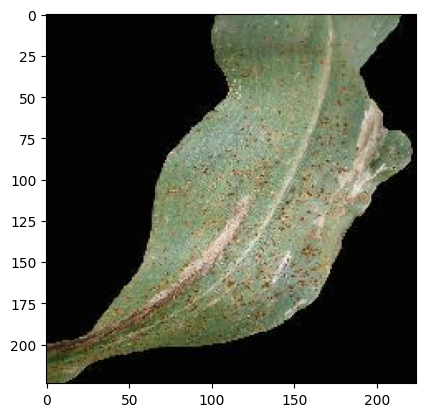

In [0]:
# *Define your image local path
filename ='/tmp/test/CornCommonRust1.JPG'

# load an image in pil format
original = load_img(filename, target_size=(224,224))
print('PIL image size', original.size)
plt.imshow(original)
plt.show()

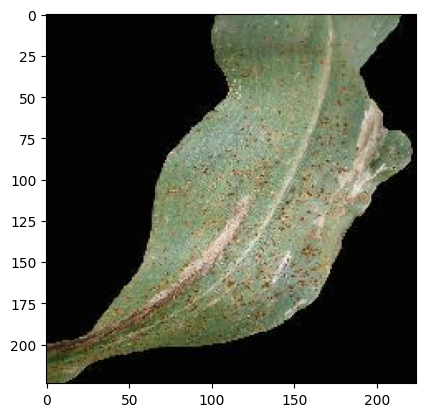

numpy array size (224, 224, 3)


In [0]:
# convert the pil image to a numpy array
# in pil is in (width, height, channel)
# in numpy - image is in (height, width , channel)
import numpy as np

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size', numpy_image.shape)

image batch size (1, 224, 224, 3)


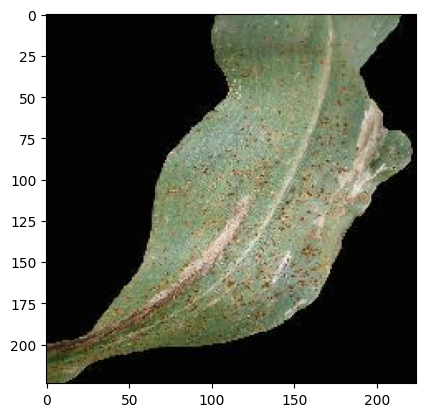

In [0]:
# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at
# a particular axis
# we want the input matrix to the network to be of the form
# (batch size, height, width, channels)
# thus we add the extra dimension to the axis 0
image_batch = np.expand_dims(numpy_image, axis = 0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [0]:
""" Since we're using EfficientNetB0, we need to import the preprocess_input function from the tensorflow keras.applications.efficientnet module"""
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input

# Preprocess the image for EfficientNetB0
processed_image = preprocess_input(image_batch.copy())

# Get the predicted probabilities for each class
predictions = model2.predict(processed_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


In [0]:
# A list of Leaf class labels, there 38 classes in total
class_labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [0]:
# Get the predicted class index for each sample
top_indices = np.argsort(predictions[0])[::-1][:5]  # Top 5 predictions

In [0]:
# Map the top indices to class labels
top_labels = [(class_labels[i], predictions[0][i]) for i in top_indices]

In [0]:
# Print the top 5 predictions with their probabilities
for label, prob in top_labels:
    print(f"Label: {label}, Probability: {prob}")

Label: Corn_(maize)___Common_rust_, Probability: 0.9999998807907104
Label: Tomato___Late_blight, Probability: 1.3868607595668436e-07
Label: Apple___Apple_scab, Probability: 1.9128987283068e-09
Label: Pepper,_bell___Bacterial_spot, Probability: 6.95263508224131e-12
Label: Tomato___Early_blight, Probability: 1.8882636339950798e-12


PIL image size: (224, 224)


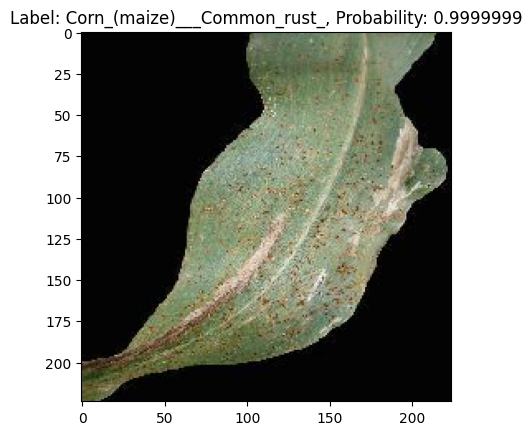

In [0]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Load and display the image
original = load_img(filename, target_size=(224, 224))
print('PIL image size:', original.size)

# Show the image
plt.imshow(original)

# Assuming 'top_labels' contains the predicted class labels and probabilities
plt.title('Label: ' + top_labels[0][0] + ", Probability: " + str(top_labels[0][1]))
plt.show()


In [0]:
# Create a function for all the process above

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input

In [0]:
def detect_leaf_disease(filepath, model, class_labels):
    """
    Detect leaf disease from an image file using a pretrained EfficientNetB0 model.

    Parameters:
    filepath (str): The path to the image file.
    model (tf.keras.Model): The pretrained model used for prediction.
    class_labels (list): The list of class labels corresponding to the model's output.

    Returns:
    None: Displays the image along with the top prediction and its probability.
    """
    try:
        # Load and display the image in PIL format
        original = load_img(filepath, target_size=(224, 224))
        print('PIL image size:', original.size)
        plt.imshow(original)
        

        # Convert the image to a numpy array
        numpy_image = img_to_array(original)
        print('Numpy array size:', numpy_image.shape)
        plt.imshow(np.uint8(numpy_image))
        

        # Expand the dimensions of the image to batch format
        image_batch = np.expand_dims(numpy_image, axis=0)
        print('Image batch size:', image_batch.shape)
        plt.imshow(np.uint8(image_batch[0]))

        # Preprocess the image for the model
        processed_image = preprocess_input(image_batch.copy())

        # Get the predicted probabilities for each class
        predictions = model.predict(processed_image)

        # Get the top 5 predictions
        top_indices = np.argsort(predictions[0])[::-1][:5]
        top_labels = [(class_labels[i], predictions[0][i]) for i in top_indices]

        # Display the top predicted label with probability
        # Extract the full label and probability
        full_label = top_labels[0][0]  # e.g., 'Corn_(maize)___Common_rust'
        probability = top_labels[0][1]  # Probability (e.g., 0.85)

        # Split the label by '___' to separate the leaf and disease
        leaf_label, disease_label = full_label.split('___')

        # Format the title to include probability
        title = f"Leaf: {leaf_label}, Diseased: {disease_label}, Probability: {probability:.4f}"

        # Show the image
        plt.imshow(original)
        plt.title(title)
        plt.show()

        # Print all top predictions
        print("Top 5 Predictions:")
        for label, prob in top_labels:
            print(f"Label: {label}, Probability: {prob:.4f}")

    except Exception as e:
        print(f"Error processing the image: {e}")

In [0]:
filepath ='/tmp/test/CornCommonRust1.JPG'

In [0]:
model = model2

In [0]:
class_labels

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

PIL image size: (224, 224)
Numpy array size: (224, 224, 3)
Image batch size: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


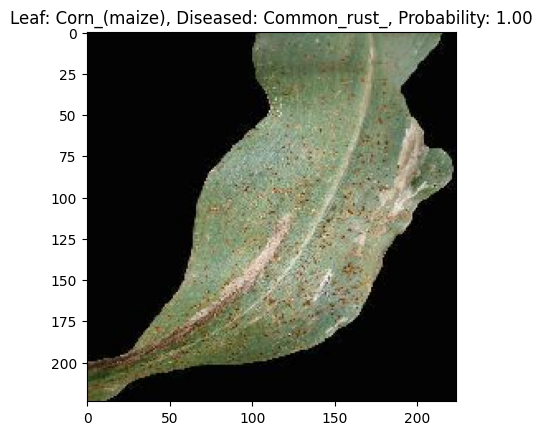

Top 5 Predictions:
Label: Corn_(maize)___Common_rust_, Probability: 1.0000
Label: Tomato___Late_blight, Probability: 0.0000
Label: Apple___Apple_scab, Probability: 0.0000
Label: Pepper,_bell___Bacterial_spot, Probability: 0.0000
Label: Tomato___Early_blight, Probability: 0.0000


In [0]:
detect_leaf_disease(filepath, model, class_labels)

In [0]:
#Test the model with random leaf image from the Internet

In [0]:
# image_dbfs = "dbfs:/image/file/path/name"
# filepath = '/tmp/imagename.jpg'
# Copy the image from DBFS to local
image_dbfs = "dbfs:/FileStore/marssonia_leaf_spot_on_euonymus_grabowski.jpg"
dbutils.fs.cp(image_dbfs, "file:/tmp/marssonia_leaf_spot_on_euonymus_grabowski.jpg", recurse=True)

True

In [0]:
filepath ='/tmp/marssonia_leaf_spot_on_euonymus_grabowski.jpg'

PIL image size: (224, 224)
Numpy array size: (224, 224, 3)
Image batch size: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


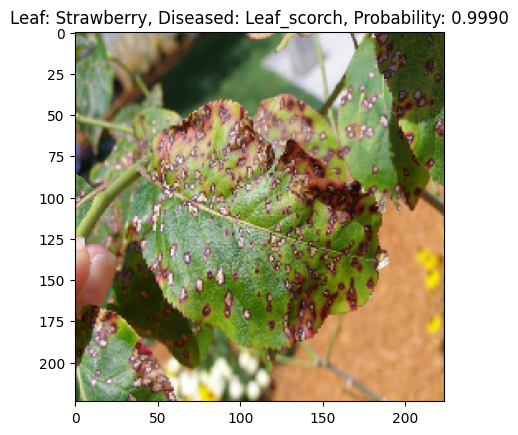

Top 5 Predictions:
Label: Strawberry___Leaf_scorch, Probability: 0.9990
Label: Tomato___healthy, Probability: 0.0004
Label: Pepper,_bell___healthy, Probability: 0.0001
Label: Tomato___Target_Spot, Probability: 0.0001
Label: Raspberry___healthy, Probability: 0.0001


In [0]:
detect_leaf_disease(filepath, model, class_labels)

In [0]:
predictions

array([[1.9128987e-09, 1.2489704e-13, 1.8828933e-13, 4.2813841e-16,
        7.8850710e-16, 1.3030025e-15, 1.8924379e-17, 2.8140173e-14,
        9.9999988e-01, 1.5121633e-12, 4.6495665e-14, 1.4456847e-16,
        3.0120112e-14, 1.7490976e-17, 5.9017464e-17, 1.3225571e-16,
        6.6965218e-15, 3.7036062e-15, 6.9526351e-12, 2.7241880e-15,
        9.8639845e-16, 3.5219471e-15, 2.4700560e-20, 1.6040820e-18,
        4.6348217e-19, 8.7462231e-13, 5.6232339e-20, 1.3755500e-18,
        1.8635479e-15, 1.8882636e-12, 1.3868608e-07, 3.7103620e-17,
        1.1343891e-12, 2.3580896e-17, 7.0667074e-15, 2.6936557e-20,
        6.2124308e-17, 4.8524854e-14]], dtype=float32)

In [0]:
# Detrmine the Accuracy Parameter of the model

In [0]:
#Import Libraries
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf, lit
from pyspark.sql.types import BinaryType, StringType, ArrayType, FloatType, DoubleType
from pyspark.ml.feature import StringIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#from tensorflow.keras.models import load_model
#from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
import tensorflow as tf
import io
from PIL import Image

In [0]:
# Initialize Spark Session
spark = SparkSession.builder.appName("TestPlantDiseaseClassification").getOrCreate()

In [0]:
# Load mô hình đã lưu/ Load the saved model
model = model2

In [0]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [0]:
import os


In [0]:
# Bring the folder contain train image to local
dbutils.fs.cp("dbfs:/FileStore/shared_uploads/minhllk24406h@st.uel.edu.vn/train", "file:/tmp/train", recurse=True)

True

In [0]:
data_dir = '/tmp/train'
classes = os.listdir(data_dir)
print(classes)

['Potato___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___healthy', 'Tomato___Septoria_leaf_spot', 'Apple___Apple_scab', 'Grape___Black_rot', 'Blueberry___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___healthy', 'Peach___Bacterial_spot', 'Corn_(maize)___healthy', 'Potato___Late_blight', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Leaf_Mold', 'Tomato___Early_blight', 'Strawberry___healthy', 'Tomato___Target_Spot', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Tomato___Tomato_mosaic_virus', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Soybean___healthy', 'Tomato___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Cherry_(including_sour)___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Corn_(maize)___Common_rust_', 

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


# Tạo tập dữ liệu huấn luyện và kiểm thử
ds_train = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # Sử dụng 20% dữ liệu cho kiểm thử
    subset="training",
    seed=123,
    image_size=(224, 224),  # Kích thước ảnh
    batch_size=None  # Kích thước batch
)

ds_test = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # Sử dụng 20% dữ liệu cho kiểm thử
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=None
)

# Lấy thông tin số lượng lớp (categories)
class_names = ds_train.class_names
NUM_CLASSES = len(class_names)

print("Number of classes:", NUM_CLASSES)
print("Class names:", class_names)

Found 7600 files belonging to 38 classes.
Using 6080 files for training.
Found 7600 files belonging to 38 classes.
Using 1520 files for validation.
Number of classes: 38
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bact

In [0]:
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))

In [0]:
def format_label(label):
    return label_info[int(label.numpy())]  # Chuyển nhãn số thành tên lớp


label_info = class_names  # Lấy tên các lớp từ ds_info

In [0]:
from keras import layers
img_augmentation_layers = [
    layers.RandomRotation(factor=0.15),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomFlip(),
    layers.RandomContrast(factor=0.1),
]


def img_augmentation(images):
    for layer in img_augmentation_layers:
        images = layer(images)
    return images

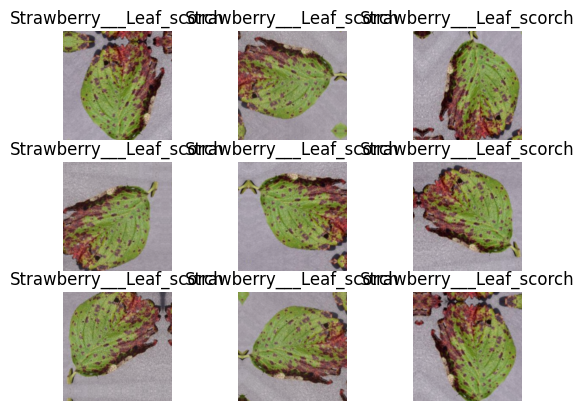

In [0]:
for image, label in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = img_augmentation(np.expand_dims(image.numpy(), axis=0))
        aug_img = np.array(aug_img)
        plt.imshow(aug_img[0].astype("uint8"))
        plt.title("{}".format(format_label(label)))
        plt.axis("off")

In [0]:
BATCH_SIZE = 32
# One-hot / categorical encoding
def input_preprocess_train(image, label):
    image = img_augmentation(image)
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


def input_preprocess_test(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


ds_train = ds_train.map(input_preprocess_train, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.batch(batch_size=BATCH_SIZE, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(input_preprocess_test, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(batch_size=BATCH_SIZE, drop_remainder=True)

In [0]:
# Predict on test model
y_pred = []
y_true = []

for images, labels in ds_test:
    preds = model2.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))  # Chọn nhãn có xác suất cao nhất
    y_true.extend(labels.numpy())            # Lưu trữ nhãn thực tế

# Convert to numpy
y_pred = np.array(y_pred)
y_true = np.array(y_true)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

In [0]:
y_pred

array([35, 36, 29, ..., 10, 10, 27])

In [0]:
y_true

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
# Convert y_true from one-hot encoding to class labels
y_true_labels = np.argmax(y_true, axis=1)

In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [0]:
# Now calculate precision score
precision = precision_score(y_true_labels, y_pred, average='weighted')

print(f'Precision: {precision}')

Precision: 0.9943400322805682


In [0]:
# Calculate Recall
recall = recall_score(y_true_labels, y_pred, average='weighted')
print(f'Recall: {recall}')

Recall: 0.9940159574468085


In [0]:
# Calculate F1 Score
f1 = f1_score(y_true_labels, y_pred, average='weighted')
print(f'F1 Score: {f1}')

F1 Score: 0.9940117420183019
